/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

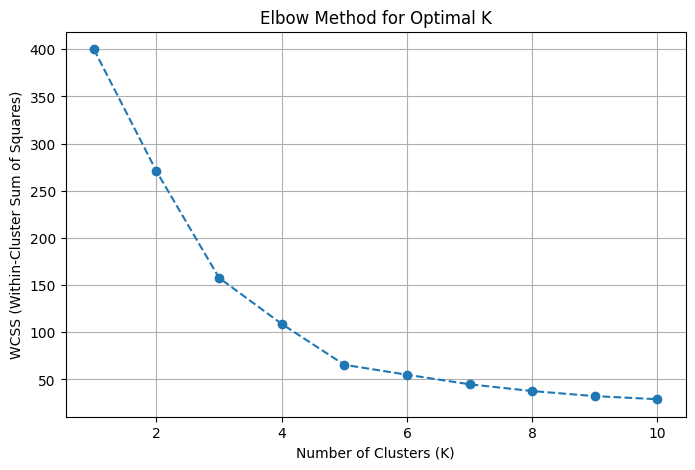

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


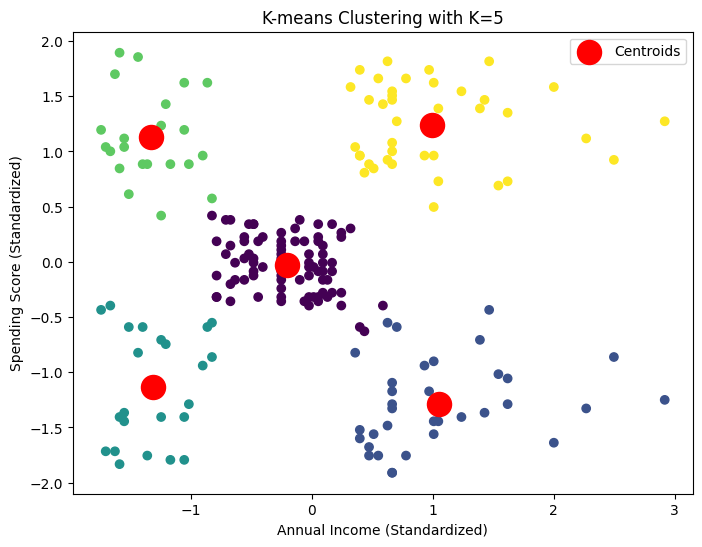

  Cluster Annual Income (k$)                     Spending Score (1-100)  \
                        mean        std min  max                   mean   
0       0          55.296296   8.988109  39   76              49.518519   
1       1          88.200000  16.399067  70  137              17.114286   
2       2          26.304348   7.893811  15   39              20.913043   
3       3          25.727273   7.566731  15   39              79.363636   
4       4          86.538462  16.312485  69  137              82.128205   

                     CustomerID  
         std min max      count  
0   6.530909  34  61         81  
1   9.952154   1  39         35  
2  13.017167   3  40         23  
3  10.504174  61  99         22  
4   9.364489  63  97         39  

Cluster 0 Insights:

Cluster 1 Insights:

Cluster 2 Insights:

Cluster 3 Insights:

Cluster 4 Insights:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Select relevant features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (K) using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Based on the Elbow Method, choose an appropriate K (number of clusters)
k = 5

# Apply K-means clustering with the selected K
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title(f'K-means Clustering with K={k}')
plt.legend()
plt.show()

# Add cluster labels to the original DataFrame
data['Cluster'] = clusters

# Analyze the characteristics of each cluster and provide insights
cluster_summary = data.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'std', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'std', 'min', 'max'],
    'CustomerID': 'count'
}).reset_index()

print(cluster_summary)

# You can also provide actionable insights based on cluster characteristics
for cluster_num in range(k):
    cluster_data = data[data['Cluster'] == cluster_num]
    print(f'\nCluster {cluster_num} Insights:')
    # Add your actionable insights here based on the characteristics of the cluster
